In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# imports
import pandas as pd
import itertools
import os
from tqdm import tqdm
import time
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('https://raw.githubusercontent.com/gregdeon/plots/main/style.mplstyle')
plt.rcParams['axes.titlesize'] = 7
plt.rcParams['figure.dpi'] = 300

In [22]:
df = pd.read_csv('/global/scratch/open_spiel/open_spiel/notebooks/greg/results/feb10_ppo.csv')

In [129]:
# Find best configs
quantile_df = df.groupby('config')['nash_conv'].quantile([0.5, 0.75, 0.9, 0.95, 1.0]).unstack()
quantile_df_best = quantile_df.sort_values(0.95).head(20)
display(quantile_df_best)
print(quantile_df_best.to_latex(float_format="%.2f"))

,0.50,0.75,0.90,0.95,1.00
config,,,,,
feb10_ppo_auctionnetppo_4,0.000000,0.001401,0.021125,0.035267,0.043833
feb10_ppo_auctionnetppo_0,0.000000,0.001220,0.072937,0.088163,0.164004
feb10_ppo_auctionnetppo_10,0.000000,0.000000,0.050535,0.207495,0.447273
feb10_ppo_auctionnetppo_1,0.000000,0.094211,0.185589,0.209253,0.254173
feb10_ppo_auctionnetppo_7,0.000000,0.021745,0.159292,0.215238,0.522490
feb10_ppo_mlpppo_24,0.000000,0.084633,0.185534,0.285855,0.497601
feb10_ppo_auctionnetppo_24,0.000000,0.094347,0.376179,0.417104,0.575700
feb10_ppo_mlpppo_17,0.000000,0.097443,0.360858,0.427448,0.583289
feb10_ppo_auctionnetppo_8,0.000000,0.314828,0.459475,0.459475,0.459475


\begin{tabular}{lrrrrr}
\toprule
 & 0.500000 & 0.750000 & 0.900000 & 0.950000 & 1.000000 \\
config &  &  &  &  &  \\
\midrule
feb10_ppo_auctionnetppo_4 & 0.00 & 0.00 & 0.02 & 0.04 & 0.04 \\
feb10_ppo_auctionnetppo_0 & 0.00 & 0.00 & 0.07 & 0.09 & 0.16 \\
feb10_ppo_auctionnetppo_10 & 0.00 & 0.00 & 0.05 & 0.21 & 0.45 \\
feb10_ppo_auctionnetppo_1 & 0.00 & 0.09 & 0.19 & 0.21 & 0.25 \\
feb10_ppo_auctionnetppo_7 & 0.00 & 0.02 & 0.16 & 0.22 & 0.52 \\
feb10_ppo_mlpppo_24 & 0.00 & 0.08 & 0.19 & 0.29 & 0.50 \\
feb10_ppo_auctionnetppo_24 & 0.00 & 0.09 & 0.38 & 0.42 & 0.58 \\
feb10_ppo_mlpppo_17 & 0.00 & 0.10 & 0.36 & 0.43 & 0.58 \\
feb10_ppo_auctionnetppo_8 & 0.00 & 0.31 & 0.46 & 0.46 & 0.46 \\
feb10_ppo_mlpppo_23 & 0.00 & 0.46 & 0.65 & 0.67 & 0.67 \\
feb10_ppo_auctionnetppo_23 & 0.00 & 0.42 & 0.63 & 0.74 & 1.35 \\
feb10_ppo_mlpppo_11 & 0.00 & 0.39 & 0.64 & 0.75 & 0.95 \\
feb10_ppo_mlpppo_1 & 0.00 & 0.33 & 0.75 & 0.82 & 0.90 \\
feb10_ppo_mlpppo_26 & 0.00 & 0.13 & 0.45 & 0.90 & 0.90 \\
feb10_ppo_ml

In [102]:
quantile_df.to_latex()

'\\begin{tabular}{lrrrrr}\n\\toprule\n & 0.500000 & 0.750000 & 0.900000 & 0.950000 & 1.000000 \\\\\nconfig &  &  &  &  &  \\\\\n\\midrule\nfeb10_ppo_auctionnetppo_0 & 0.000000 & 0.001220 & 0.072937 & 0.088163 & 0.164004 \\\\\nfeb10_ppo_auctionnetppo_1 & 0.000000 & 0.094211 & 0.185589 & 0.209253 & 0.254173 \\\\\nfeb10_ppo_auctionnetppo_10 & 0.000000 & 0.000000 & 0.050535 & 0.207495 & 0.447273 \\\\\nfeb10_ppo_auctionnetppo_11 & 19.864782 & 31.717648 & 32.256989 & 32.256989 & 32.256989 \\\\\nfeb10_ppo_auctionnetppo_12 & 9.881291 & 30.688156 & 31.879451 & 32.256989 & 32.256989 \\\\\nfeb10_ppo_auctionnetppo_13 & 0.000000 & 0.630219 & 0.903651 & 0.903651 & 0.903651 \\\\\nfeb10_ppo_auctionnetppo_14 & 0.000000 & 0.314828 & 3.166282 & 8.720770 & 12.415901 \\\\\nfeb10_ppo_auctionnetppo_15 & 0.010619 & 0.121364 & 0.636345 & 1.989238 & 4.527288 \\\\\nfeb10_ppo_auctionnetppo_16 & 27.329531 & 30.688156 & 31.879451 & 32.256989 & 32.256989 \\\\\nfeb10_ppo_auctionnetppo_17 & 5.869635 & 30.688156 & 31.8

In [54]:
count_df = df.groupby('config')['nash_conv'].count()
count_df.sort_values().head(20)

config
feb10_ppo_mlpppo_28          11
feb10_ppo_mlpppo_2           12
feb10_ppo_mlpppo_12          12
feb10_ppo_mlpppo_14          12
feb10_ppo_mlpppo_20          13
feb10_ppo_mlpppo_25          13
feb10_ppo_mlpppo_11          15
feb10_ppo_mlpppo_22          15
feb10_ppo_mlpppo_4           16
feb10_ppo_mlpppo_8           17
feb10_ppo_mlpppo_7           17
feb10_ppo_mlpppo_6           17
feb10_ppo_mlpppo_23          17
feb10_ppo_mlpppo_15          18
feb10_ppo_mlpppo_13          18
feb10_ppo_mlpppo_10          18
feb10_ppo_mlpppo_1           18
feb10_ppo_mlpppo_16          18
feb10_ppo_mlpppo_17          18
feb10_ppo_auctionnetppo_0    18
Name: nash_conv, dtype: int64

In [55]:
df.query('config == "feb10_ppo_auctionnetppo_4"')[['base_game_name', 'rule', 'nash_conv']]

,base_game_name,rule,nash_conv
6,feb10_2p_5type_0,base,0.000000
7,feb10_2p_5type_0,base,0.000000
9,feb10_2p_5type_0,base,NaN
83,feb10_2p_5type_0,tie_break,30.688156
89,feb10_2p_5type_0,tie_break,30.688156
95,feb10_2p_5type_0,tie_break,NaN
186,feb10_2p_5type_1,base,1.541347
187,feb10_2p_5type_1,base,NaN
188,feb10_2p_5type_1,base,1.541347
276,feb10_2p_5type_1,tie_break,31.717648


In [59]:
cfr_df = pd.read_csv('/global/scratch/open_spiel/open_spiel/notebooks/greg/results/feb10_2p_v1.csv')
cfr_df.query('n_types == 5').groupby('config')['nash_conv'].quantile([0, 0.1, 0.5, 0.9, 0.95, 1]).unstack()

,0.00,0.10,0.50,0.90,0.95,1.00
config,,,,,,
cfr_10_no_tremexternal_plus_linear_no_trem,0.0,0.0,0.0,0.0,0.0,0.011253
cfr_10external_plus_linear,0.0,0.0,0.0,0.0,0.0,0.021449


# Plot Tuning Results

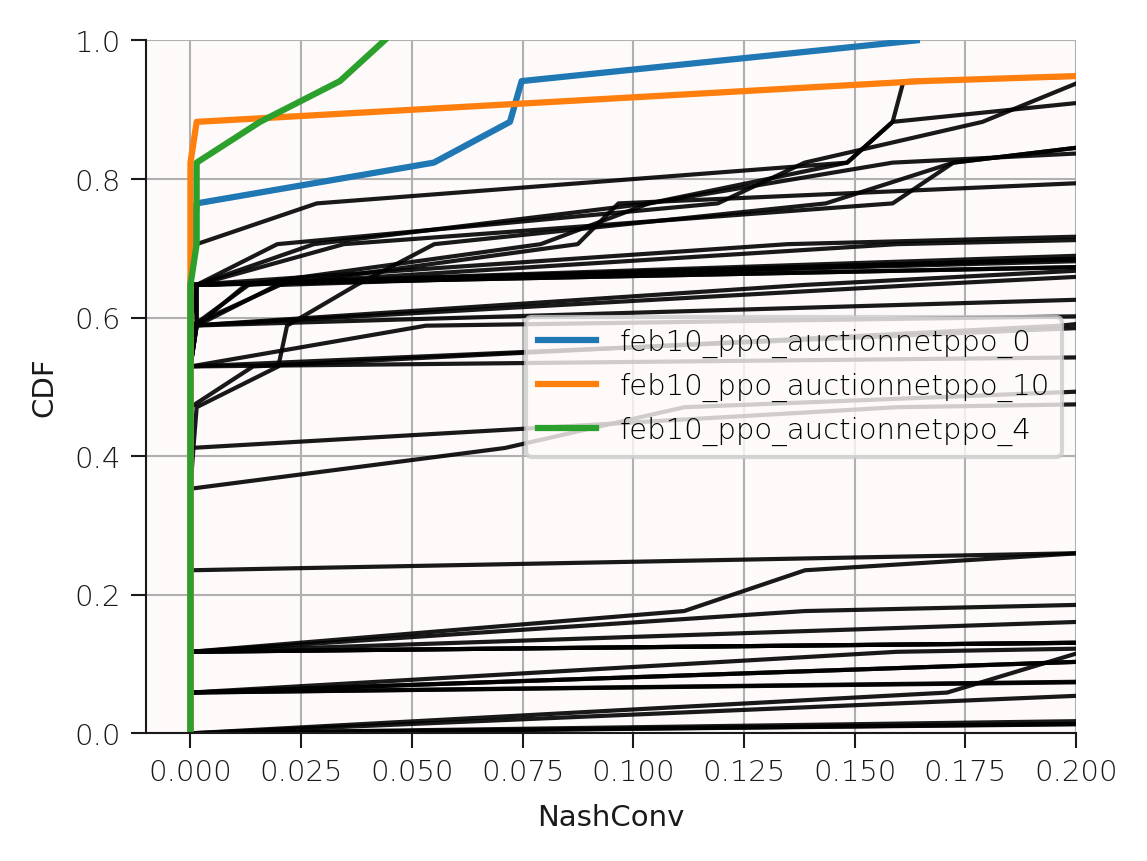

In [58]:
import numpy as np
for config in df.config.unique():
    df_config = df.query(f'config == "{config}"')
    q = np.linspace(0, 1, len(df_config))
    nash_convs = df_config['nash_conv'].quantile(q)
    nash_conv_config = df_config['nash_conv']
    plt.plot(nash_convs, q, c='k', alpha=0.9, linewidth=1)

for good_config in [
    'feb10_ppo_auctionnetppo_0',
    'feb10_ppo_auctionnetppo_10',
    'feb10_ppo_auctionnetppo_4',
]:
    df_config = df.query(f'config == "{good_config}"')
    nash_conv_config = df_config['nash_conv']
    plt.plot(sorted(nash_conv_config), np.linspace(0, 1, len(nash_conv_config)), label=good_config)
plt.xlim(-0.01, 0.20)
plt.ylim(0, 1)
plt.xlabel('NashConv')
plt.ylabel('CDF')
plt.legend()
plt.show()

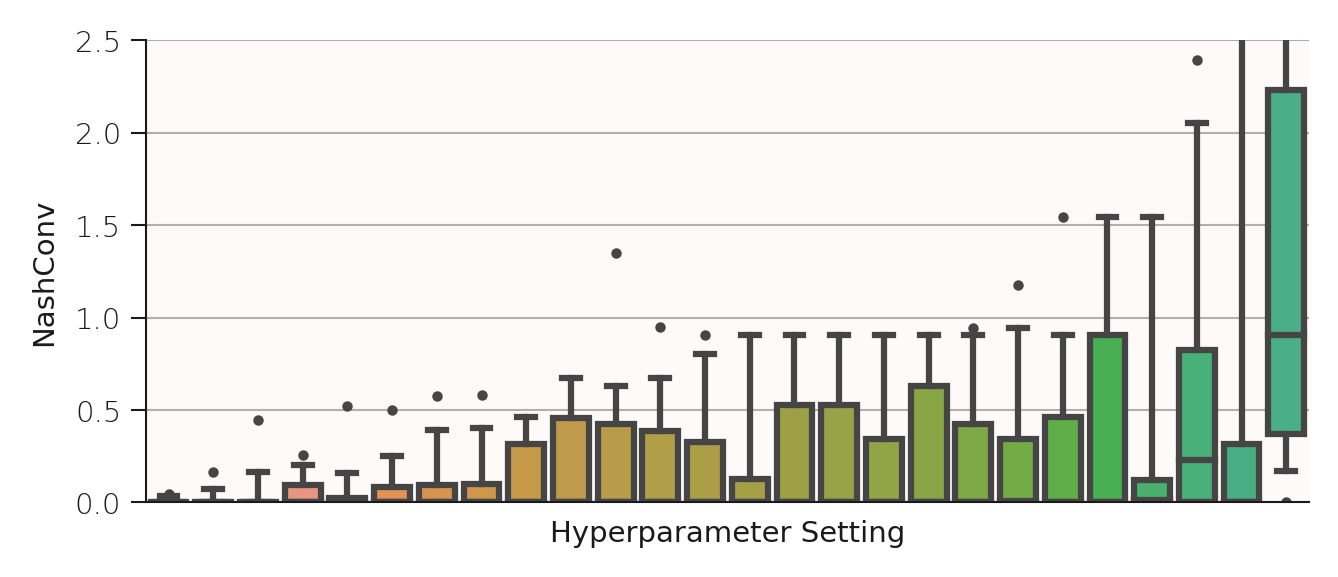

In [111]:
df_plot = df[['config', 'nash_conv']]
df_nc = df_plot.groupby('config')['nash_conv'].quantile(0.95).sort_values()
plt.figure(figsize=(5, 2))
sns.boxplot(data=df_plot, x='config', y='nash_conv', whis=(5, 95), order=df_nc.index, flierprops={'marker': 'o', 'markersize': 1.5})
# plt.ylim(0, 10)
plt.xlim(-0.5, 25.5)
plt.ylim(0, 2.5)
plt.xticks([])
plt.xlabel('Hyperparameter Setting')
plt.ylabel('NashConv')
plt.savefig('/global/scratch/open_spiel/open_spiel/notebooks/greg/figures/ppo_tuning/ppo_nash_conv.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

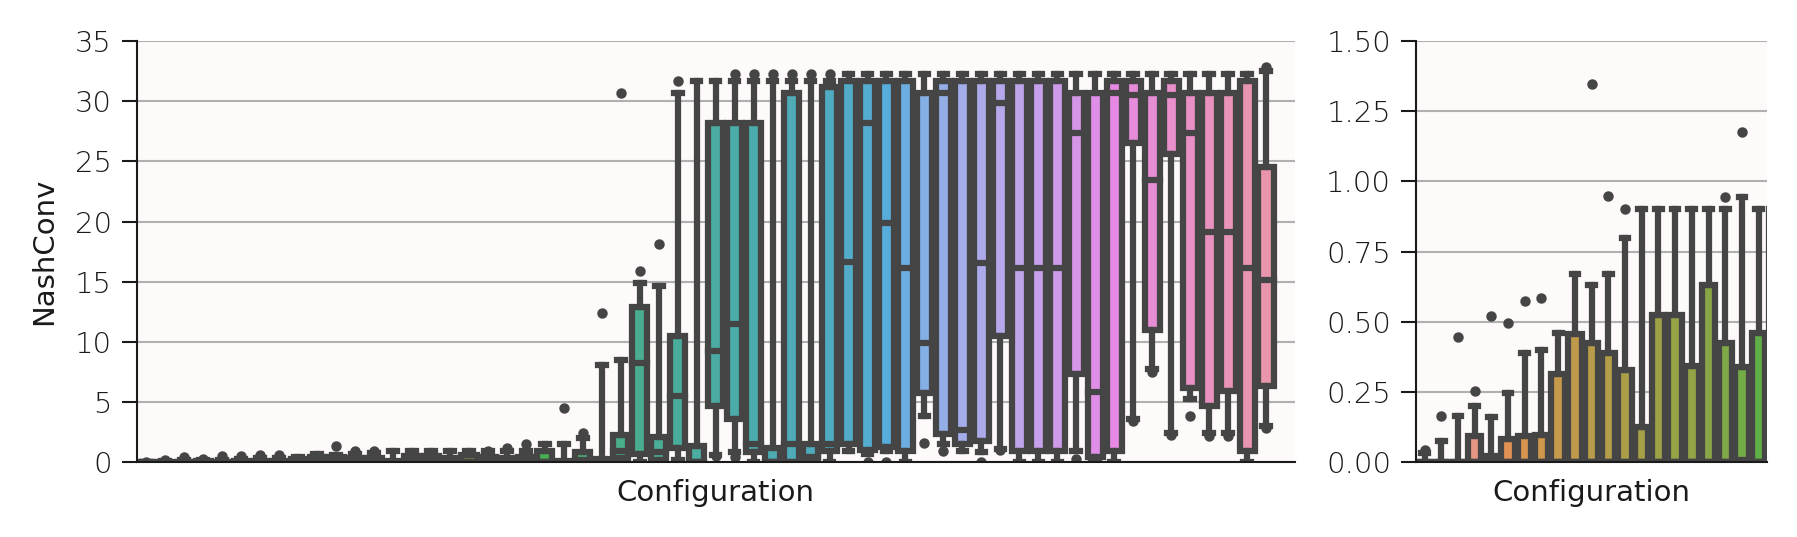

In [127]:
df_plot = df[['config', 'nash_conv']]
df_nc = df_plot.groupby('config')['nash_conv'].quantile(0.95).sort_values()
fig, ax = plt.subplots(1, 2, figsize=(6, 1.8), width_ratios=[3.3, 1])
for ax_i in ax:
    plt.sca(ax_i)
    sns.boxplot(data=df_plot, x='config', y='nash_conv', whis=(5, 95), order=df_nc.index, flierprops={'marker': 'o', 'markersize': 1.5})
    plt.xticks([])
    plt.xlabel('Configuration')

ax[0].set_xlim(-0.5, 60.5)
ax[0].set_ylim(0, 35)
ax[0].set_ylabel('NashConv')

ax[1].set_xlim(-0.5, 20.5)
ax[1].set_ylim(0, 1.5)
ax[1].set_ylabel('')

plt.tight_layout()
plt.savefig('/global/scratch/open_spiel/open_spiel/notebooks/greg/figures/ppo_tuning/ppo_nash_conv.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

# Additional Plots: convergence on 3-player games

In [4]:
df = pd.read_csv('results/feb12_3p_ppo_v1.csv')

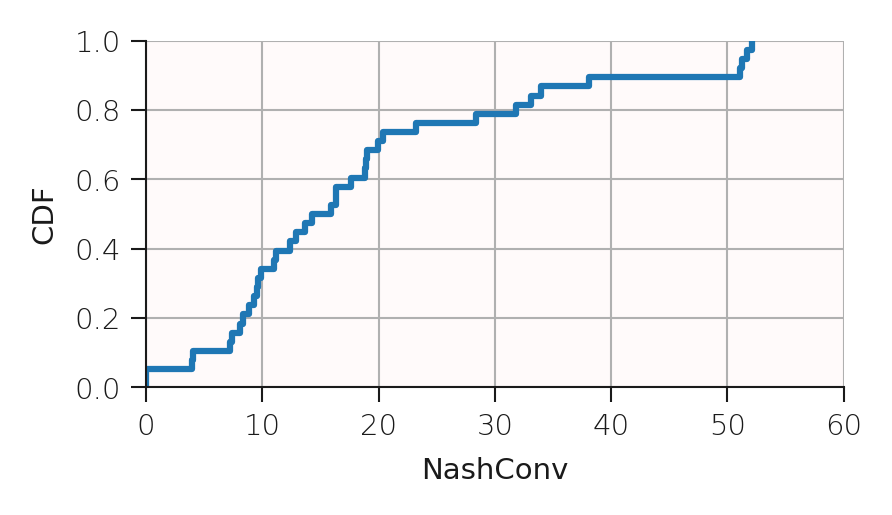

In [15]:
plt.figure(figsize=(3, 1.5))
sns.ecdfplot(df.nash_conv.values)
plt.xlabel('NashConv')
plt.ylabel('CDF')
plt.xlim(0, 60)
plt.savefig('figures/ppo_tuning/ppo_3p_nash_conv.png', bbox_inches='tight')